## Assignment - 2 
Author: Athul Muralidhar 11391553

This sourcecode is written in Python 3


Q.Write down the equations you are going to solve for the harmonic oscillator as a system of
first order differential equations. You also need to define two sensible boundary conditions.
What is the analytical solution?

Ans: The main eqations are:

$$ \dot{x} = v $$
$$ \dot{v} = -kx $$

where the overdotes denote diffrentiation w.r.t time. The two initial boundry conditions can be:

1)  at time $t = 0, v = 0$ as there is no velocity of the spring beforehand.

2) at $t=0,x=1$ as the lenght of the spring is normalised to be 1. 


Sloving the equations explicitely, we have:

$$
\dot{x} = v
$$
$$
\frac{dx}{dt} = v
$$
$$ dx = vdt$$
using variable supperable method, we have:
$$ x = vt + c$$ 
from boundry condition 2) we then set $c=1$. We can now sub this into the second equation for $v$, then:
$$ \frac{dv}{dt} = -k(vt+1)$$
if we set k = 1 for simplicity, we then have:
$$ \frac{d^{2}x}{dt^{2}} = vt + 1$$
The general solution of this equation is of the form:
$$ x = A\cos(\omega t) + B\sin(\omega t)$$ but at t = 0, we only have the $\cos$ part. Identifying A = 1, we get to our initial condition of x(t=0) = 1, we also make our life easier by setting k = m = 1.
Hence the final solution is: $$ x(t) = \cos(t)$$

Regarding the various truncation errors, starting from eqn (19) we have:
$$ \frac{df(x)}{dx} \approx \frac{f(x+h) - f(x)}{h}$$
If we take the Tylor expansion for $f(x)$ around a point a  we get:

$$f(x) = f(x) + \frac{f'(x)(x-a)}{2}+ \mathcal{O}((x-a)^{2})+...$$ 

assigning $f'(x)=g(x)$ and the constant number $(x -a)/2=h$, we get: 

$$f(x) = f(x) + g(x)h + \mathcal{O}(h^{2})+...$$

If we do the same for $f(x+h)$, we get:

$$f(x+h) = f(x+h) + \frac{f'(x)(x+h-a)}{2} + \mathcal{O}((x+h-a)^{2})+...$$ 

$$f(x+h) = f(x+h) + g(x)(h) + \mathcal{O}((h)^{2})+...$$ 

Hence the local errors $\propto \mathcal{O}(h^{2})$ the global errors however $\propto \mathcal{O}(h)$ as they loose a $h$ by cancelling with the denominator.

For the SHO of the spring we have:

$$ \begin{pmatrix}
x_{i+1} \\
v_{i+1}
\end{pmatrix}
=
\begin{pmatrix}
1 & h \\
-h & 1
\end{pmatrix}
\begin{pmatrix}
x_{i} \\
v_{i}
\end{pmatrix}
$$

The general analytic solution for $x$ is:
$$ x = A\cos(k^{1/2}t+\phi)$$
for convenience, I have set A = k = 1 and $\phi = 0$ so that at t = 0, x = 1


# A flowchart of the general structure of the algorithm:

![title](./Untitled Diagram.jpg)

# Now, the code:

In [8]:
#initial imports
import numpy as np
import matplotlib.pyplot as plt

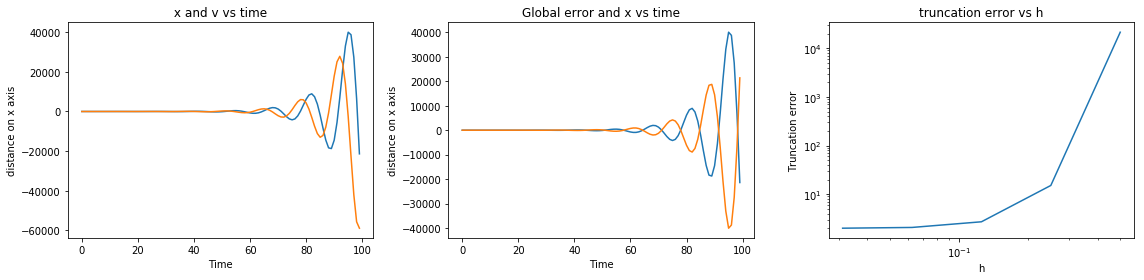

In [56]:

"""Euler forward method
Note: all variables with an extra 1 are used for calculating truncation errors
"""
x = list(np.zeros(100))
v = list(np.zeros(100))
x1 = list(np.zeros(100)) # for truncation error plotting
v1 = list(np.zeros(100))
x_anl = list(np.zeros(100))
xdiff = []

x[0]=1 # nomralising the length of the spring to be 1.

h=0.5
x1[0] = 1
H = [h/i for i in (1,2,4,8,16)] # for calculating truncation errors
# print(H)
x_anl = [np.cos(i) for i in range(100)]


for i in range(99):
        x[i+1]  = x[i] + h*v[i]
        v[i+1]  = v[i] - h*x[i]


for h1 in H:
    
    for i in range(99):
        x1[i+1]  = x1[i] + h1*v1[i]
        v1[i+1]  = v1[i] - h1*x1[i]
    
    xdiff.append(max([i - j for (i, j) in zip(x_anl, x1)]))
    
    


i = range(100)
diff = [i - j for (i, j) in zip(x_anl, x)]
    
# print(x_anl)
# print(x,v)


#plotting


plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
ax = plt.gca()
ax.set_title(" x and v vs time ")
plt.plot(i,x)
plt.plot(i,v)
plt.xlabel("Time")
plt.ylabel("distance on x axis")

plt.subplot(1,3,2)
ax = plt.gca()
ax.set_title("Global error and x vs time")
plt.plot(i,x)
# plt.plot(i,x_anl)
plt.plot(i,diff)
plt.xlabel("Time")
plt.ylabel("distance on x axis")

plt.subplot(1,3,3)
ax = plt.gca()
ax.set_title("truncation error vs h")
plt.loglog(H,xdiff)
plt.xlabel("h")
plt.ylabel("Truncation error")

plt.tight_layout()
plt.show()
        
        

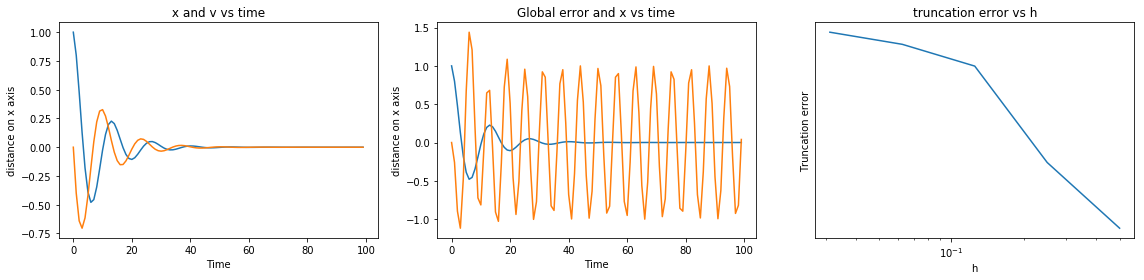

In [57]:
""" euler backward method 
Note: all variables with an extra 1 are used for calculating truncation errors
"""

x = list(np.zeros(100))
v = list(np.zeros(100))
x1 = list(np.zeros(100)) # for truncation error plotting
v1 = list(np.zeros(100))
xdiff = []

x[0]=1 # nomralising the length of the spring to be 1. 
h=0.5

x1[0] = 1
H = [h/i for i in (1,2,4,8,16)] # for calculating truncation errors


for i in range(99):
        x[i+1]  = (x[i] + h*v[i])/(1+h**2)
        v[i+1]  = (v[i] - h*x[i])/(1+h**2)

        

for h1 in H:
    
    for i in range(99):
        x1[i+1]  = (x1[i] + h1*v1[i])/(1+h1**2)
        v1[i+1]  = (v1[i] - h1*x1[i])/(1+h1**2)
    
    xdiff.append(max([i - j for (i, j) in zip(x_anl, x1)]))
    
    
    
x_anl = [np.cos(i) for i in range(100)]
diff = [i - j for (i, j) in zip(x_anl, x)]

i = range(100)
# print(x,v)

#plotting

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
ax = plt.gca()
ax.set_title(" x and v vs time ")
plt.plot(i,x)
plt.plot(i,v)
plt.xlabel("Time")
plt.ylabel("distance on x axis")

plt.subplot(1,3,2)
ax = plt.gca()
ax.set_title("Global error and x vs time")
plt.plot(i,x)
plt.plot(i,diff)
plt.xlabel("Time")
plt.ylabel("distance on x axis")


plt.subplot(1,3,3)
ax = plt.gca()
ax.set_title("truncation error vs h")
plt.loglog(H,xdiff)
plt.xlabel("h")
plt.ylabel("Truncation error")

plt.tight_layout()
plt.show()
        
        

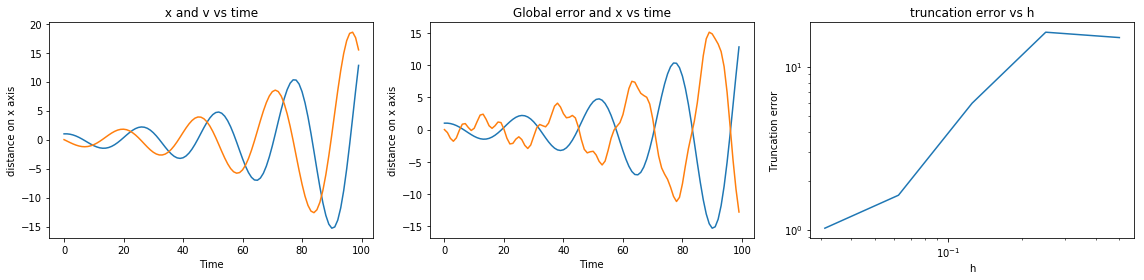

In [14]:
    """ the midpoint method 
    Note: all variables with an extra 1 are used for calculating truncation errors
    """

x = list(np.zeros(100))
v = list(np.zeros(100))
x1 = list(np.zeros(100)) # for truncation error plotting
v1 = list(np.zeros(100))
xdiff = []

x[0] = 1 # nomralising the length of the spring to be 1. 
h = 0.5

x1[0] = 1

H = [h/i for i in (1,2,4,8,16)] # for calculating truncation errors

    for i in range(99):
        kx1 = h*v[i]
        kv1 = -h*x[i]
        kx2 = h*(v[i] + (v[i+1]-v[i])/2)# v[i+1] = 1 step in h
        kv2 = -h*(x[i] + (x[i+1]-x[i])/2)
        x[i+1]  = x[i] + kx2
        v[i+1]  = v[i] + kv2


    for h1 in H:
        for i in range(99):
            kx11 = h1*v1[i]
            kv11 = -h1*x1[i]
            kx21 = h1*(v1[i] + (v1[i+1]-v1[i])/2)# v[i+1] = 1 step in h
            kv21 = -h1*(x1[i] + (x1[i+1]-x1[i])/2)
            x1[i+1]  = x1[i] + kx21
            v1[i+1]  = v1[i] + kv21

    
        xdiff.append(max([i - j for (i, j) in zip(x_anl, x1)]))
    
    

i = range(100)
x_anl = [np.cos(i) for i in range(100)]
diff = [i - j for (i, j) in zip(x_anl, x)]
# print(x,v)

#plotting
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
ax = plt.gca()
ax.set_title(" x and v vs time ")
plt.plot(i,x)
plt.plot(i,v)
plt.xlabel("Time")
plt.ylabel("distance on x axis")

plt.subplot(1,3,2)
ax = plt.gca()
ax.set_title("Global error and x vs time")
plt.plot(i,x)
plt.plot(i,diff)
plt.xlabel("Time")
plt.ylabel("distance on x axis")


plt.subplot(1,3,3)
ax = plt.gca()
ax.set_title("truncation error vs h")
plt.loglog(H,xdiff)
plt.xlabel("h")
plt.ylabel("Truncation error")

plt.tight_layout()
plt.show()

        

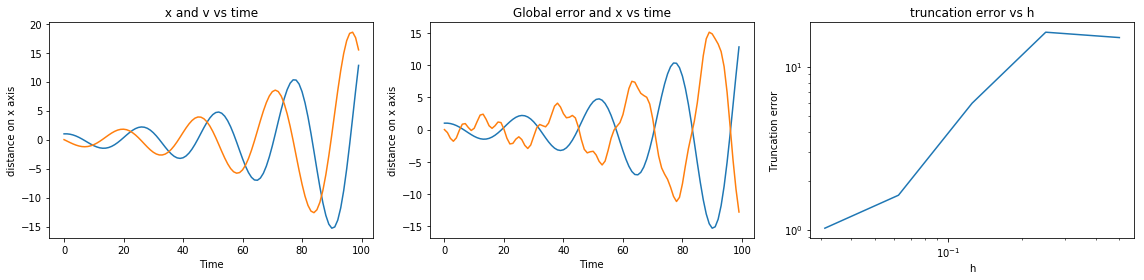

In [15]:
    """ the Runge Kutta O(4) method 
    Note: all variables with an extra 1 are used for calculating truncation errors
    """

x = list(np.zeros(100))
v = list(np.zeros(100))
x1 = list(np.zeros(100)) # for truncation error plotting
v1 = list(np.zeros(100))
xdiff = []

x[0]=1 # nomralising the length of the spring to be 1. 
h=0.5

x1[0] = 1
H = [h/i for i in (1,2,4,8,16)] # for calculating truncation errors


for i in range(99):
        
        kx1 = h*v[i]
        kv1 = -h*x[i]
        kx2 = h*(v[i] + (v[i+1]-v[i])/2)  # v[i+1] = 1 step in h
        kv2 = -h*(x[i] + (x[i+1]-x[i])/2)
        kx3 = h*(v[i] + (v[i+1]-v[i])/2)
        kv3 = -h*(x[i] + (x[i+1]-x[i])/2)
        kx4 = h*v[i+1]
        kv4 = -h*x[i+1]
        x[i+1]  = x[i] + kx1/6 + kx2/3 + kx3/3 + kx4/6
        v[i+1]  = v[i] + kv1/6 + kv2/3 + kv3/3 + kv4/6

        
for h1 in H:
        for i in range(99):
            kx11 = h1*v1[i]
            kv11 = -h1*x1[i]
            kx21 = h1*(v1[i] + (v1[i+1]-v1[i])/2)  # v[i+1] = 1 step in h
            kv21 = -h1*(x1[i] + (x1[i+1]-x1[i])/2)
            kx31 = h1*(v1[i] + (v1[i+1]-v1[i])/2)
            kv31 = -h1*(x1[i] + (x1[i+1]-x1[i])/2)
            kx41 = h1*v1[i+1]
            kv41 = -h1*x1[i+1]
            x1[i+1]  = x1[i] + kx11/6 + kx21/3 + kx31/3 + kx41/6
            v1[i+1]  = v1[i] + kv11/6 + kv21/3 + kv31/3 + kv41/6
    
        xdiff.append(max([i - j for (i, j) in zip(x_anl, x1)]))
    
i = range(100)
x_anl = [np.cos(i) for i in range(100)]
diff = [i - j for (i, j) in zip(x_anl, x)]

# print(x,v)

#plotting

plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
ax = plt.gca()
ax.set_title(" x and v vs time ")
plt.plot(i,x)
plt.plot(i,v)
plt.xlabel("Time")
plt.ylabel("distance on x axis")

plt.subplot(1,3,2)
ax = plt.gca()
ax.set_title("Global error and x vs time")
plt.plot(i,x)
plt.plot(i,diff)
plt.xlabel("Time")
plt.ylabel("distance on x axis")


plt.subplot(1,3,3)
ax = plt.gca()
ax.set_title("truncation error vs h")
plt.loglog(H,xdiff)
plt.xlabel("h")
plt.ylabel("Truncation error")

plt.tight_layout()
plt.show()

        